## More plotting

- Descriptive statistics
- Other statistical plots

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


## Loading simple text data

Consider a simple text file like `data/data.txt` which is located the
`data` directory on the interface. The file has two columns of data like so:
```
6.930830303506971291e+01 1.950570203348928500e+00
5.076032587226054460e+01 1.968615715715650527e+00
6.285323760945500027e+01 1.343008070563283418e+00
7.068897251770047774e+01 1.602208201785916941e+00
...
```
This can be easily loaded as a numpy array like so:

In [4]:
# Change the path to suit your setup.
data = np.loadtxt('../data/data.txt')

In [5]:
print(len(data))
data[:2]

100


array([[69.30830304,  1.9505702 ],
       [50.76032587,  1.96861572]])

- Look at the documentation for `np.loadtxt`
- Since this has two columns, we can use `unpack=True` to extract the two columns

In [6]:
x, y = np.loadtxt('../data/data.txt', unpack=True)
print(len(x), len(y))
x[:2]

100 100


array([69.30830304, 50.76032587])

## Mean, std-dev, percentiles, ...

Now let us look at some simple statistics of this data.

In [7]:
np.mean(x)

np.float64(64.37622951831253)

In [8]:
np.mean(y)

np.float64(1.7163359811861927)

In [ ]:
# This is the biased estimator.
np.std(x)


The biased estimator is:
$$\sigma^2 = \frac{\sum_{i=1}^n (X_i - \bar{X})^2}{n}$$
The unbiased estimator is:
$$\sigma^2 = \frac{\sum_{i=1}^n (X_i - \bar{X})^2}{n-1}$$

In [ ]:
# The unbiased estimator
np.std(x, ddof=1)

In [ ]:
np.median(x)

### Percentiles

In [ ]:
np.percentile(x, 50)

In [ ]:
# Get multiple in one shot.
np.percentile(x, [25, 50, 75, 90])

## Exercise

- For the data below
- Find the percentiles from 0 to 100 (in unit steps)
- Plot them


Text(0.5, 0, 'percentile')

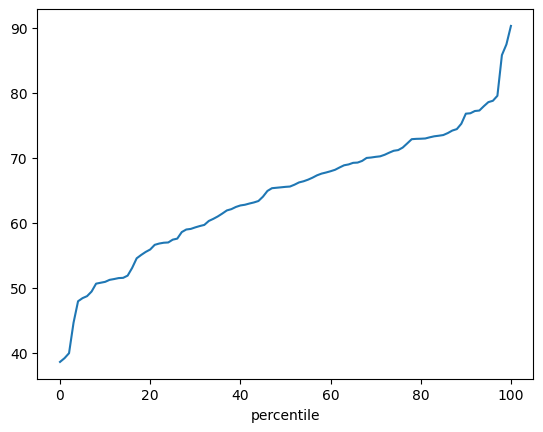

In [12]:
# Solutio
t=np.percentile(x,range(0,101))
plt.plot(range(0,101), t)
plt.xlabel("percentile")

## Scatter plots

Useful to get a sense of the data and their relationship

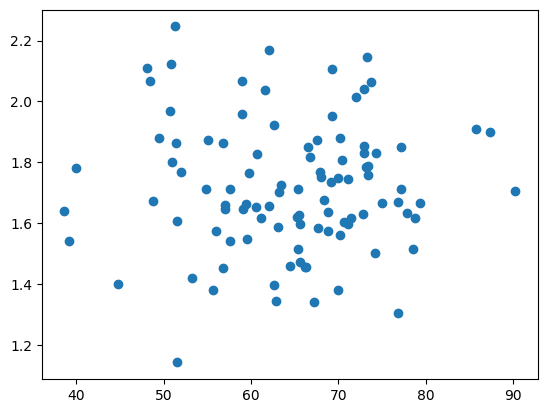

In [13]:
plt.scatterter(x, y);

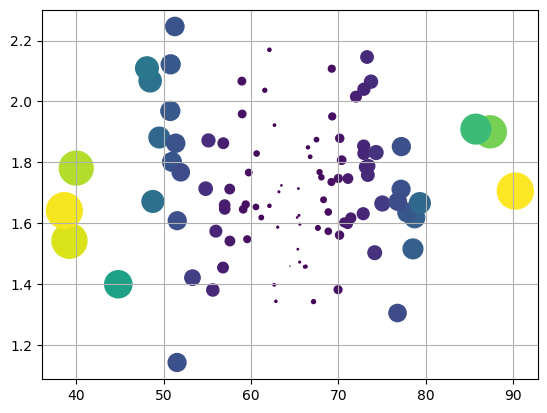

In [14]:
# Can also show size and color.
# We construct a simple scalar to display.
s = (x-np.mean(x))**2 + (y - np.mean(y))**2
plt.scatter(x, y, c=s, s=s)
plt.grid();

## Histograms

Very useful to get a sense of the distribution of the data.

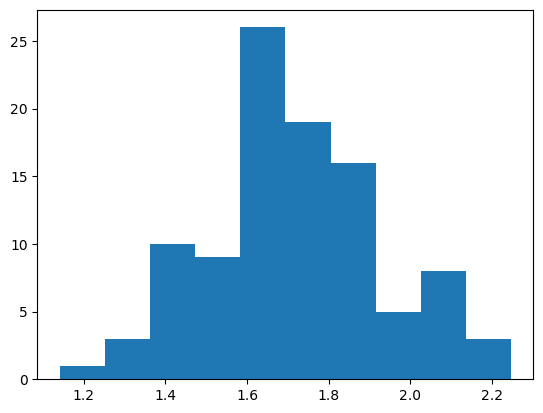

In [15]:
plt.hist(y);

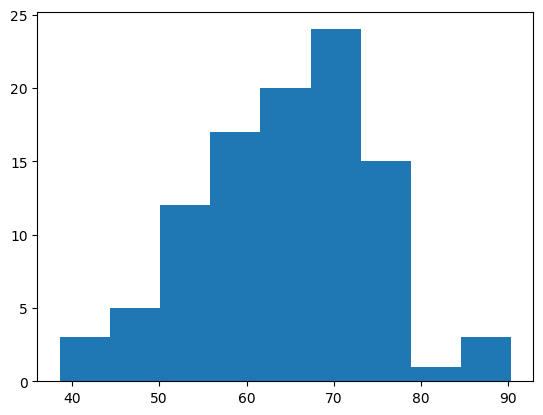

In [16]:
# Warning default bins are just 10, using 'auto' is always a better idea.
plt.hist(x, bins='auto');

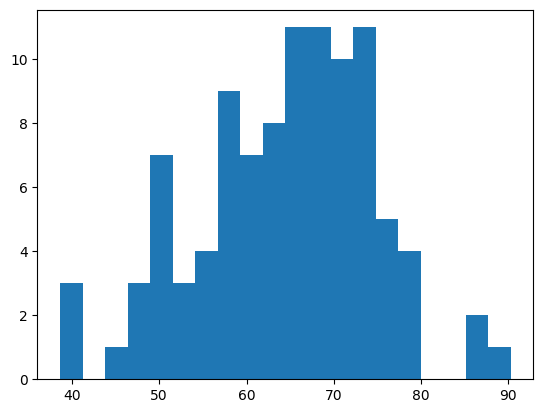

In [17]:
# But if you know better you can specify the number of bins.
plt.hist(x, bins=20);

Note the output of this is the counts, bins_edges, patches
counts, bins, patches = plt.hist(x, bins='auto');

In [ ]:
# Numpy is used to generate the counts, bins
c, b = np.histogram(x, bins='auto')

In [ ]:
np.allclose(c, counts) and np.allclose(b, bins)

### Cumulative and relative histograms

- Hope you've seen this in your Statistics course?
- You get an empirical probability density function (PDF) through a
  histogram!
- But this has to be a relative histogram, i.e. use `density=True`
- A cumulative histogram is an approximation to a Cumulative Distribution
  Function (CDF)

This is very important and valuable as we will see later.

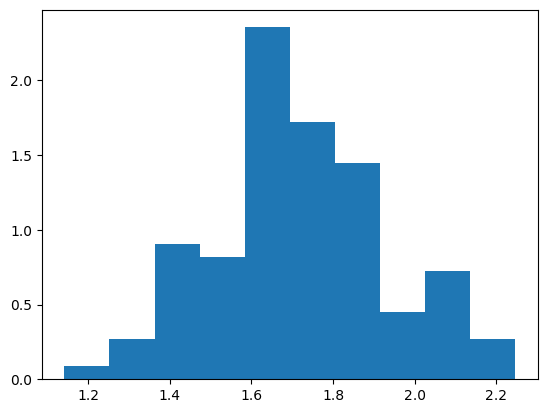

In [20]:
# Relative histogram.
plt.hist(y, bins='auto', density=True);

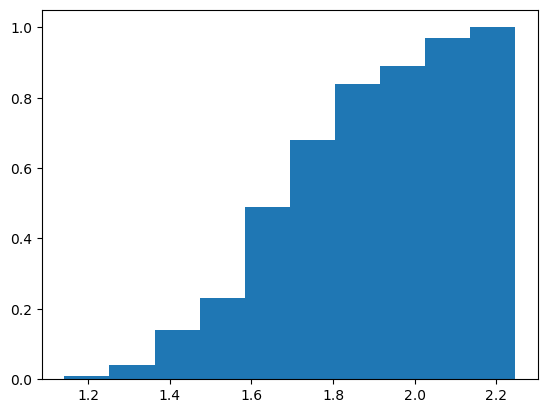

In [19]:
plt.hist(y, bins='auto', cumulative=True, density=True);

## Box-plots

- Powerful plotting utility
- Shows the distribution of the data at a glance
- Typically shows the following:
   - Median, Q1, Q3, IQR
   - Q1 - 1.5 x IQR, Q3 + 1.5 x IQR


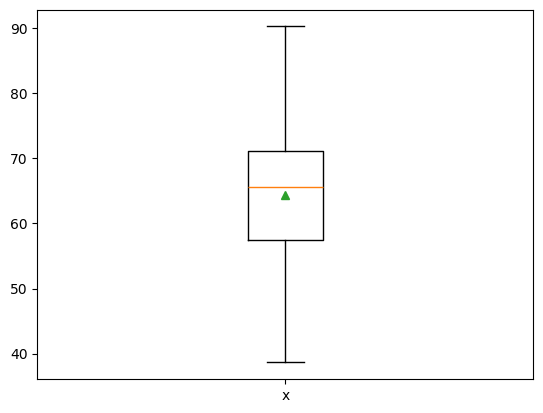

In [23]:
plt.boxplot(x, labels=['x'], showmeans=True);

- Can show multiple boxplots together


In [ ]:
plt.boxplot((x, y), tick_labels=['x', 'y'], showmeans=True, patch_artist=True);

## Violin plots!

- Combine PDFs and box plots.


In [ ]:
violinplot(x);

In [ ]:
violinplot(y);

## Pearson's correlation coefficient

 $$\begin{aligned}
 r = \frac{\sum_i (x_i - \bar{x}) (y_i - \bar{y})}{(n-1) s_x s_y} \\
 \end{aligned}$$$$r = \frac{\sum_i (x_i - \bar{x}) (y_i - \bar{y}) }
          {\sqrt {\sum (x_i - \bar{x})^2 \sum (y_i - \bar{y})^2}}$$

- $-1 \leq r \leq 1$
- \"Small\" r implies lower correlation

In [ ]:
np.corrcoef(x, y)

## Pie and bar charts.

- In general avoid pie charts, use barcharts/histograms instead.
- But here is how you can do this.

Consider this data:

| **Cancer**  | Lung | Breast | Colon | Prostate | Melanoma | Bladder |
|-------------|------|--------|-------|----------|----------|---------|
| **Numbers** | 42   |  50    |  32   |   55     |  9       |  12     |


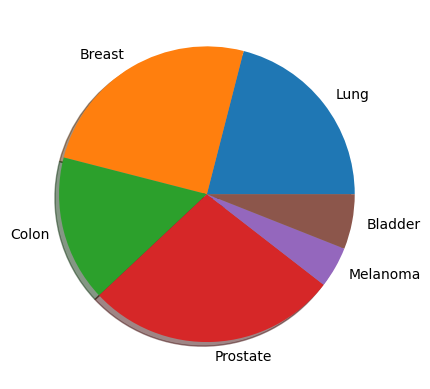

In [24]:
# Solution
cancer = ['Lung', 'Breast', 'Colon', 'Prostate', 'Melanoma', 'Bladder']
numbers = [42, 50, 32, 55, 9, 12]
plt.pie(numbers, labels=cancer, shadow=True);

### Better to use a bar chart


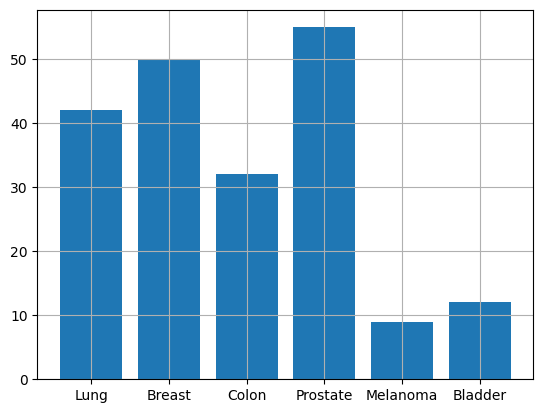

In [25]:
x = np.arange(len(numbers))
plt.bar(x, numbers, tick_label=cancer)
plt.grid();

## Exercise

- Load the data in `'sachin.txt'`, and `'kohli.txt'`
- These have the ODI runs for Sachin Tendulkar and Virat Kohli
- They have a single column each
- Load the data using `np.loadtxt`
- Show a histogram (relative) for each.
- Show them together, use the same approach as we did for boxplot.
- Hint: use `plt.legend` to set the legend
- Show the data using a boxplot
- Show the data using a violin plot.

Comment on the player's performance

In [29]:
# Solution
sachin =np.loadtxt('../data/sachin.txt')
kohli=np.loadtxt('../data/kohli.txt')

In [49]:
max(kohli)

np.float64(183.0)

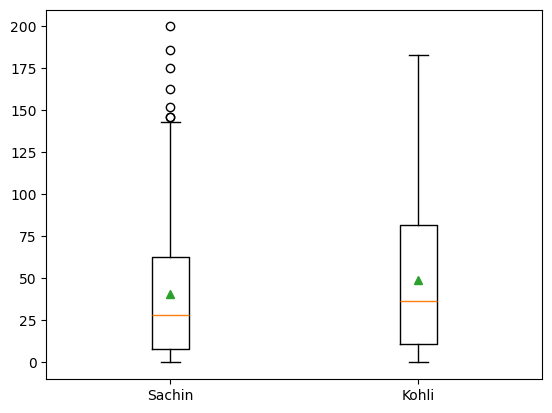

In [47]:
plt.boxplot((sachin,kohli), labels=['Sachin','Kohli'], showmeans=True);


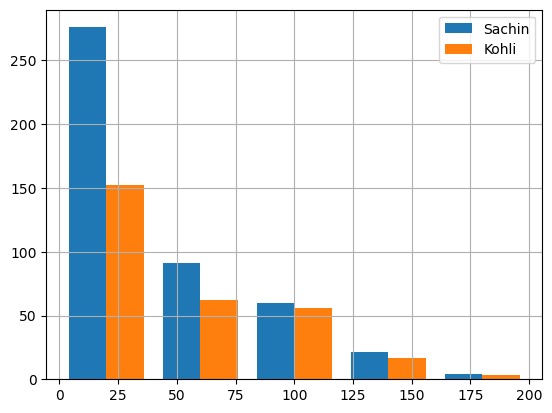

In [61]:
len(sachin)
plt.hist((sachin,kohli), bins=5)
#plt.hist(kohli,bins='auto' , label='Kohli');
plt.legend(["Sachin","Kohli"])
plt.grid()


In [62]:
a,b=len(sachin), len(kohli)
print(a,b)

452 290


## Connection to probability theory

- We've seen various kinds of plots
- So far this is entirely visual
- We can actually do very powerful things with this

Let us first look at how histograms work.

- Counts number of occurrences in each bin.
- Bins are chosen automatically via `'auto'` or explicitly specified

### Probability mass function (PMF)

- Used for discrete distributions, Bernoulli, Binomial, Poisson etc.
- Assigns probability for each value $p(x)$
- Empirically, this is basically the relative count of occurrence of the
  value! Note that this is exactly how a relative histogram is found.

### Probability density function (PDF)

- Used for discrete distributions, uniform, normal, Chi-square, T etc.
- Probability density function: $f(x)$
- Probability in some region of $x$, $\Delta x$ is: $f(x) \Delta x$

In this case, for N data points, the values of the histogram are = `count/(N*bin_width)``
This produces the density function.

Consider Sachin's scores

In [ ]:
ds = np.loadtxt('../data/sachin.txt')
print(len(ds), max(ds))

In [ ]:
# A simple histogram is not enough
plt.hist(ds, bins='auto', density=True);

- The problem with this is that this is not really a probability mass
  function.
- It is a PDF.

In [ ]:
# This will produce a rough PMF
plt.hist(ds, bins=range(201), density=True);


This is not perfect since we have only about 450 points in total (which is
quite a bit).

If all we want is the counts without a plot, we can simply use `np.histogram`

In [ ]:
pmf, bins = np.histogram(ds, bins=range(201), density=True)

### Why is this useful

If you know the PMF/PDF you basically know a great deal about the data.
You can use it to ask all sort sof probability based questions.

- What is the median score, what is the IQR, etc.?
- What is the probability that Sachin will score < 10?
- What is the probability that he will score > 50?
- What is the probability that he will score > 100 given that he crossed 50?

These are quite deep questions that can be easily answered with the data.
You can do this to even compare players.

## Exercise

Try to answer some of these quickly.

1. What is the probability that Sachin will score < 10?
2. What is the probability that Sachin will score > 50?
3. What is the probability that he will cross 100 given that he crossed 50?

We can do this either with a PMF or a PDF.

In [ ]:
# Note on how the CDF is made.
c, b = np.histogram(ds, bins=range(201), density=True)
counts = np.cumsum(c)


## Exercise

1. Write a simple function that returns the PMF for a batsman's data given
   their scores.
2. Also generate the cumulative distribution function.
3. Write a function to compute probabilities in a range (a, b) given the
   PMF/CDF.


As you can see, the PDF/PMF is incredibly useful when answering practical
questions.

We will upload an exercise for you to do based on these.



## Interactivity with widgets

- Jupyter widgets or [IPyWidgets](https://ipywidgets.readthedocs.io/) make
  it very easy to add interactivity to a notebook.
- Already installed on the course website.
- Usually already installed in Anaconda.

Here we learn the bare-minimum to get started. Read the docs to learn more.


In [ ]:
from ipywidgets import interact

In [ ]:
def sine_plot(k=1, phi=0.0):
    x = np.linspace(0, 2*np.pi, 1000)
    y = np.sin(x*k + phi)
    plt.plot(x, y)
    plt.grid()

In [ ]:
sine_plot(k=2, phi=0.5)

In [ ]:
interact(sine_plot, k=(1, 20), phi=(0, 2*np.pi))

Can also use the decorator syntax

In [ ]:
@interact(k=(1, 20), phi=(0, 2*np.pi))
def sine_plot(k=1, phi=0.0):
    x = np.linspace(0, 2*np.pi, 1000)
    y = np.sin(x*k + phi)
    plt.plot(x, y)
    plt.grid()

### Another example


In [ ]:
@interact(name=['Krishna', 'Prabhu', 'Hassan'], n=(0, 10), x=(0.0, 1.0))
def f(option=True, hi='Hello', name='Krishna', n=1, x=0.1):
    print(option, hi, name, n, x)

### Aside: decorators

- Decorators are higher order functions
- Operate on a function and return a function


In [ ]:
# Trivial example
def deco(f):
    return f

In [ ]:
@deco
def g(x):
    pass

# Equivalent to
h = deco(g)

In [ ]:
g(1)

In [ ]:
# More complex example
def deco1(f):
    def _my_f(x):
        print("Hello!")
        return f(x)
    return _my_f

In [ ]:
@deco1
def g(x):
    return x + 1

In [ ]:
g(1)

## Summary

- Statistical quantities: mean, median, std. dev., percentiles
- Statistical plots: scatter plot, histogram, boxplot, bar/pie chart, violin
  plot
- Correlation coefficient
- Practical applications and answering some very interesting questions
- Interactivity with `ipywidets` and `interact`
- Decorators